# Задания

In [1]:
import sys
sys.path.append('../code-samples/')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

## Задание 1

Загрузи информацию о [заявках на кредит](../datasets/credit_scoring.csv). 
Перечисли имена клиентов, которым должны одобрить заявку на кредит, исходя из изображенного дерева решений.

<center><img src="../misc/images/simple-tree.png" width="440" height="440"/> <center/>

In [3]:
df = pd.read_csv('../datasets/credit_scoring.csv')
df = df.reset_index()
df

,index,Имя,Возраст,Месячный доход
0,0,Николай,39,5600
1,1,Ольга,43,12000
2,2,Митя,17,15000
3,3,Вика,19,9600
4,4,Петр,21,20000
5,5,Кирилл,13,500


In [4]:
df['age_target'] = df['Возраст'].apply(lambda x: [1, 0][x < 18])
df['comp_target'] = df['Месячный доход'].apply(lambda x: [0, 1][x > 10000])
df['target'] = df['age_target'] & df['comp_target']
df

,index,Имя,Возраст,Месячный доход,age_target,comp_target,target
0,0,Николай,39,5600,1,0,0
1,1,Ольга,43,12000,1,1,1
2,2,Митя,17,15000,0,1,0
3,3,Вика,19,9600,1,0,0
4,4,Петр,21,20000,1,1,1
5,5,Кирилл,13,500,0,0,0


In [5]:
lst = df[df['target'] == 1]['Имя'].to_list()
print('Клиенты, которым должны одобрить заявку на кредит: ', end='')
print(*lst, sep=', ')

Клиенты, которым должны одобрить заявку на кредит: Ольга, Петр


Клиенты, которым должны одобрить заявку на кредит: ____

## Задание 2

Давай решим задачу классификации.
Загрузи классический датасет [классификации ирисов](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset).
В нем содержатся измерения параметров чашелистиков и лепестков для различных подвидов ирисов. 
Отрисуй диаграмму рассеяния (Scatterplot) в координатах "Длина чашелистика" / "Длина лепестка", цвет маркера должен 
показывать вид ириса. Обязательно добавь легенду по маркерам. 

In [6]:
# Код тут
from sklearn import datasets
from pandas import DataFrame
import seaborn as sns
iris = datasets.load_iris()
df_iris = DataFrame(iris.data)
df_iris.columns = iris.feature_names
df_iris['target'] = iris.target
df_iris['name'] = df_iris.target.apply(lambda x: iris.target_names[x])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Text(0.5, 1.0, 'Диаграмма рассеяния различных подвидов ирисов')

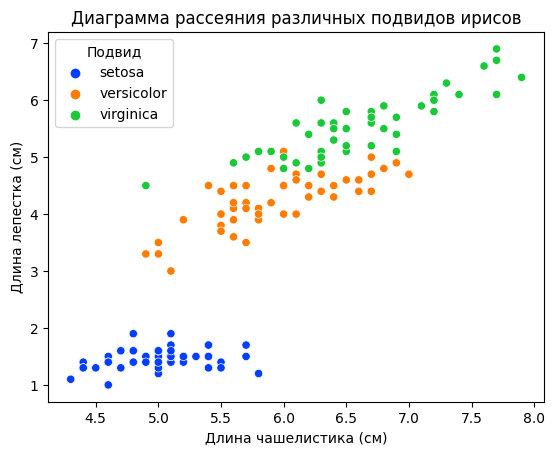

In [7]:
ax1 = sns.scatterplot(x=df_iris['sepal length (cm)'], y=df_iris['petal length (cm)'],
                      hue=df_iris.name, palette='bright')
ax1.set_ylabel('Длина лепестка (см)')
ax1.set_xlabel('Длина чашелистика (см)')
ax1.legend().set_title('Подвид')
ax1.set_title('Диаграмма рассеяния различных подвидов ирисов')
# print(str(ax1.get_figure().to_dict()))

## Задание 3

Попробуй решить задачу классификации подвидов ирисов с помощью деревьев решений.
Раздели датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`

Используя только признаки "Длина чашелистика" и "Длина лепестка", обучи дерево решений с глубиной дерева 2.
Посчитай точность (accuracy) классификации и округли её до 3 знаков после запятой.

In [8]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_iris[['sepal length (cm)', 'petal length (cm)']],
                                                    df_iris['target'], test_size=0.2, random_state=42)
x_train.head(5), x_train.shape
# y_train.head(5)

(    sepal length (cm)  petal length (cm)
 22                4.6                1.0
 15                5.7                1.5
 65                6.7                4.4
 11                4.8                1.6
 42                4.4                1.3,
 (120, 2))

In [9]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred).round(3)
accuracy

0.967

## Задание 4

Построй [разделяющую поверхность](../code-samples/surface.py) по признакам "Длина чашелистика" и "Длина лепестка". 
Также отрисуй дерево, которое получилось в результате обучения модели. 
Напиши сколько листов у получившегося дерева.

In [11]:
from surface import *

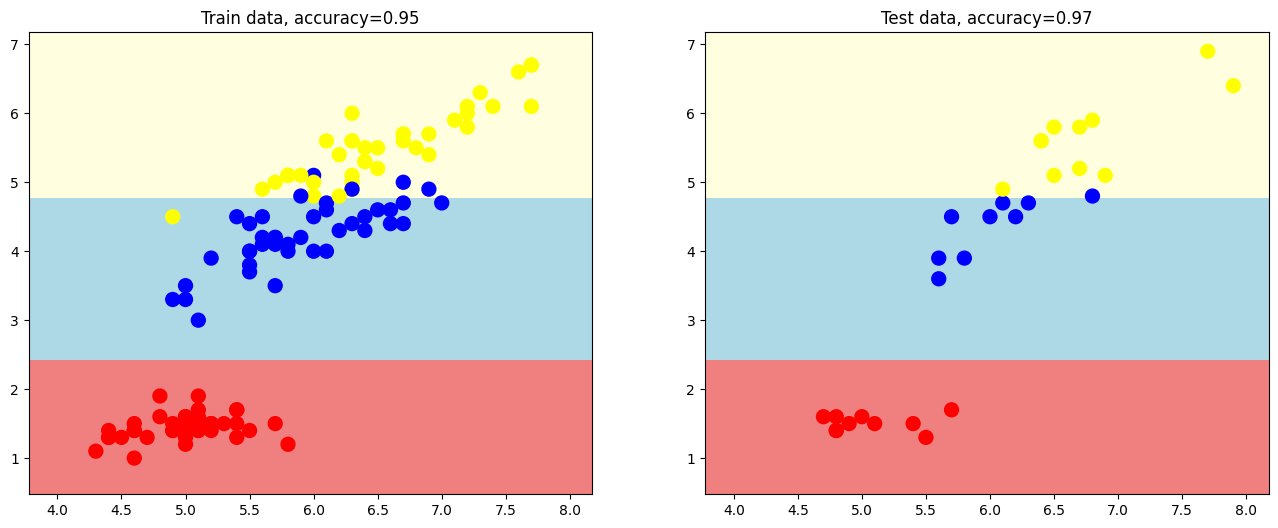

In [12]:
# clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(x_train.values, y_train)
plot_decision_surface(clf, x_train, y_train, x_test, y_test)

[Text(0.4, 0.8333333333333334, 'x[1] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[1] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.206\nsamples = 43\nvalue = [0, 5, 38]')]

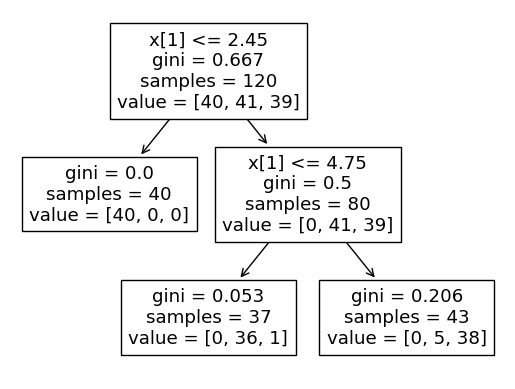

In [13]:
tree.plot_tree(clf)

In [14]:
print('У получившегося дерева', clf.tree_.n_leaves, 'листа')

У получившегося дерева 3 листа


У получившегося дерева <u>3</u> листа

## Задание 5

Теперь попробуем с помощью деревьев решений решить задачу регрессии.
Сгенерируй [синусоидальный сигнал](code-samples/dataset.py) с небольшими шумами размером 250 отсчетов. 
Раздели датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`.
Обучи дерево решений для предсказания синусоидального сигнала c глубиной дерева 1. 
Построй график истинных ответов и предсказаний модели. Построив само дерево решений ты сможешь понять причины такого поведения модели.

Text(0, 0.5, 'Y')

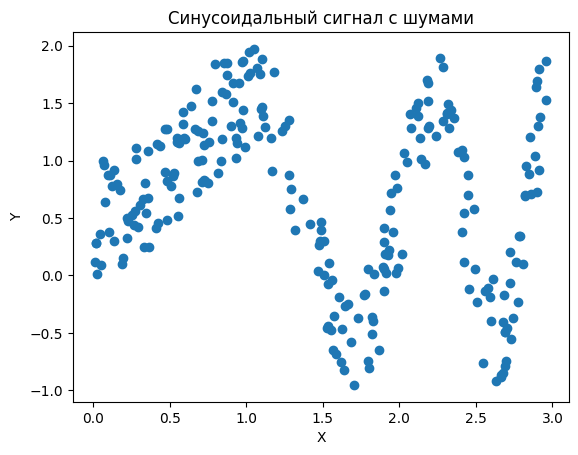

In [15]:
import matplotlib.pyplot as plt
from dataset import generate_sin
X, y = generate_sin(250, 1)
plt.scatter(X, y)
plt.title('Синусоидальный сигнал с шумами')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

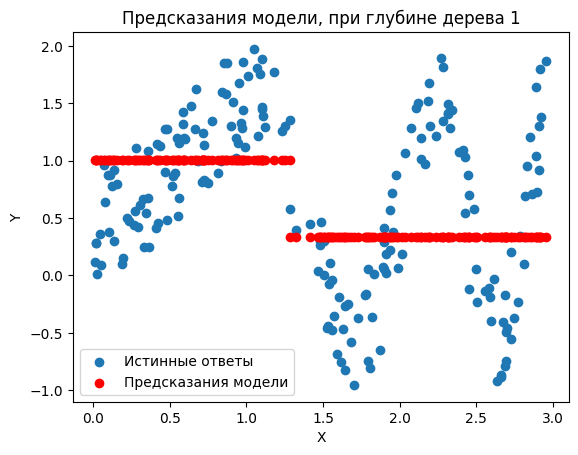

In [16]:

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
clf = tree.DecisionTreeRegressor(max_depth=1)
pred = clf.fit(x_train, np.ravel(y_train))
plt.scatter(x_train, np.ravel(y_train))
plt.scatter(x_train, clf.predict(x_train), c='red')
plt.legend(['Истинные ответы', 'Предсказания модели'])
plt.title('Предсказания модели, при глубине дерева 1')
plt.xlabel('X')
plt.ylabel('Y')

[Text(0.5, 0.75, 'x[0] <= 1.283\nsquared_error = 0.542\nsamples = 200\nvalue = 0.642'),
 Text(0.25, 0.25, 'squared_error = 0.238\nsamples = 92\nvalue = 1.004'),
 Text(0.75, 0.25, 'squared_error = 0.593\nsamples = 108\nvalue = 0.333')]

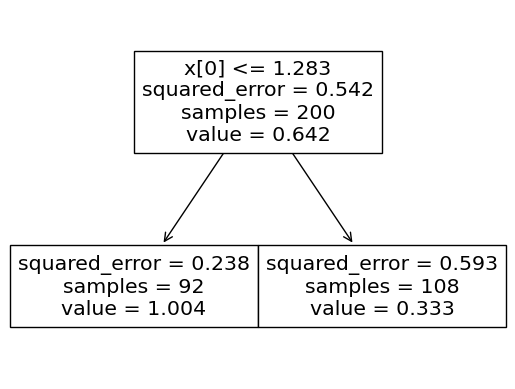

In [17]:
tree.plot_tree(clf)

## Задание 6

Попробуй менять грубину дерева в дереве решений для предсказания синуса.
Построй график зависимости среднеквадратичной ошибки (MSE) предсказания на тестовой выборке от глубины дерева
(от 1 до 30). Напиши глубину дерева, при которой качество модели наилучшее. 

[0.442, 0.352, 0.29, 0.165, 0.149, 0.156, 0.167, 0.164, 0.163, 0.186, 0.184, 0.184, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182]


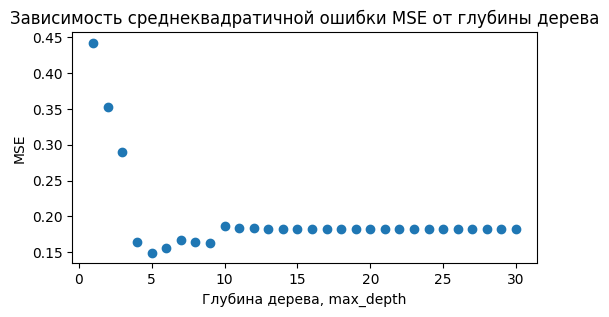

In [18]:
from sklearn.metrics import mean_squared_error


plt.figure(figsize=(6, 3))

mse = []
# y1 = []
min_mse = 0
min_mse_depth = 0
for i in range(1, 31):
    clf = tree.DecisionTreeRegressor(max_depth=i)
    clf.fit(x_train, np.ravel(y_train))
    y_pred = clf.predict(x_test)
    mse.append(mean_squared_error(y_test, np.ravel(y_pred)).round(3))
    # y1.append(np.mean((y_test - y_pred)**2).round(3))
    # y1.append(np.mean(np.square(np.subtract(y_test, y_pred))).round(3))
# print(y)
# print(y1)

plt.scatter(range(1, 31), mse)
plt.title('Зависимость среднеквадратичной ошибки MSE от глубины дерева')
plt.xlabel('Глубина дерева, max_depth')
plt.ylabel('MSE')
# plt.scatter(range(1,31), y1, c='red');
print(mse)

In [19]:
print('Глубина дерева, на котором MSE на тестовой выборке наилучший: ',
      mse.index(min(mse))+1)

Глубина дерева, на котором MSE на тестовой выборке наилучший:  5


Глубина дерева, на котором MSE на тестовой выборке наилучший: <u>5</u>

## Задание 7

Познакомься с методом bootstrap. Воспользуйся `BaggingRegressor` из `sklearn.ensemble` для того, чтобы обучить сразу 
несколько деревьев решений c параметром `max_depth=5`. \
Рассчитай среднеквадратичную ошибку (MSE) предсказания на тестовой выборке. Построй график зависимости MSE 
от **количества базовых моделей** в `BaggingRegressor` с параметрами `bootstrap=True, random_state=42` (от 1 до 50). 
Напиши количество деревьев, при котором качество модели наилучшее. 

In [20]:
X.shape

(250, 1)

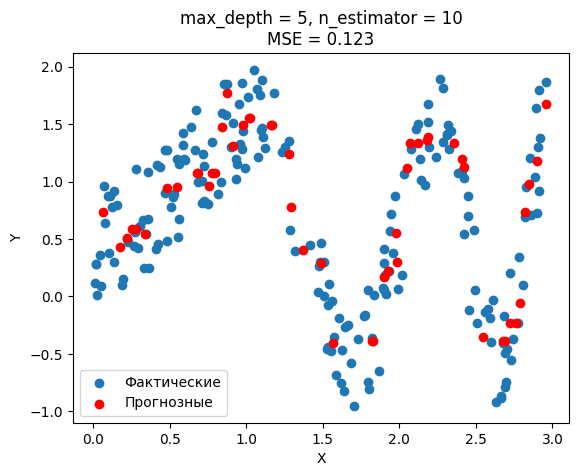

In [21]:
from sklearn.ensemble import BaggingRegressor
tr = tree.DecisionTreeRegressor(max_depth=5)
regr = BaggingRegressor(estimator=tr, max_samples=1.0,
                        bootstrap=True, bootstrap_features=True, max_features=1.0)
regr.fit(x_train, np.ravel(y_train))
pred = regr.predict(x_test)
plt.scatter(x_train, np.ravel(y_train))
plt.scatter(x_test, pred, c='red')
plt.title('max_depth = 5, n_estimator = 10\nMSE = {}'.
          format(mean_squared_error(np.ravel(y_test), pred).round(3)))
plt.legend(['Фактические', 'Прогнозные'])
plt.xlabel('X')
plt.ylabel('Y')

In [27]:
# tr.fit(x_train, np.ravel(y_train))
# tree.plot_tree(tr);

In [23]:
from sklearn.metrics import accuracy_score
max_estimators = 50

mse = []
acc = []
for i in range(1, max_estimators+1):
    regr = BaggingRegressor(estimator=tree.DecisionTreeRegressor(max_depth=5, random_state=42),
                            bootstrap=True, n_estimators=i,
                            random_state=42, max_samples=30)
    regr.fit(x_train, np.ravel(y_train))
    pred = regr.predict(x_test)

#    y.append(np.mean((y_test - pred)**2).round(3))
    mse.append(mean_squared_error(np.ravel(y_test), pred).round(3))
    # acc.append(accuracy_score(y_test, pred).round(3))
print(mse)
print(acc)

[0.355, 0.169, 0.183, 0.179, 0.209, 0.193, 0.171, 0.161, 0.154, 0.153, 0.158, 0.147, 0.144, 0.14, 0.147, 0.14, 0.141, 0.138, 0.134, 0.131, 0.137, 0.144, 0.143, 0.142, 0.147, 0.145, 0.145, 0.145, 0.145, 0.141, 0.142, 0.139, 0.14, 0.139, 0.138, 0.137, 0.136, 0.134, 0.135, 0.138, 0.136, 0.133, 0.131, 0.129, 0.127, 0.127, 0.127, 0.126, 0.126, 0.127]
[]


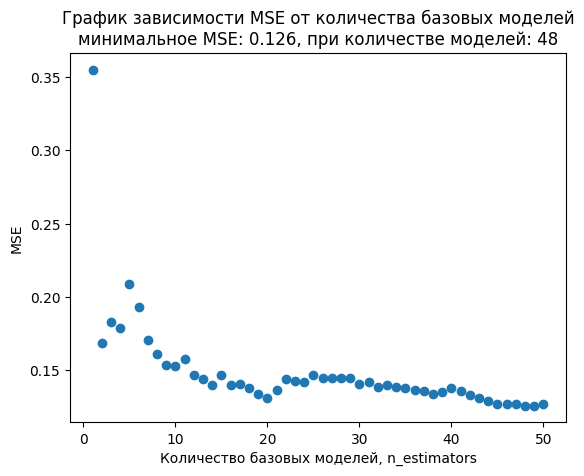

In [24]:
plt.scatter(range(1, max_estimators+1), mse)
# plt.scatter(range(1, 51), acc, c='red')
plt.title('График зависимости MSE от количества базовых моделей\n' +
          'минимальное MSE: {}, при количестве моделей: {}'.format(min(mse), mse.index(min(mse))+1))
plt.xlabel('Количество базовых моделей, n_estimators')
plt.ylabel('MSE')
plt.show()

In [25]:
print('Количество деревьев решений, при котором MSE на тестовой выборке наилучший:',
      mse.index(min(mse))+1)

Количество деревьев решений, при котором MSE на тестовой выборке наилучший: 48


Количество деревьев решений, при котором MSE на тестовой выборке наилучший: __

## Задание 8

Познакомься с алгоритмом случайного леса (Random Forest). Обучи алгоритм случайного леса с параметрами `max_depth=5, 
n_estimators=100, max_features=1, random_state=42`.
Посчитай MSE на тестовой выборке и округли её до 3 знаков после запятой.

In [26]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
regr = RandomForestRegressor(
    n_estimators=100, max_depth=5, max_features=1, random_state=42)
regr.fit(x_train, np.ravel(y_train))
pred = regr.predict(x_test)
# y.append(np.mean((y_test - pred)**2).round(3))
mse = mean_squared_error(y_test, pred).round(3)
print('MSE на тестовой выборке =', mse)

MSE на тестовой выборке = 0.123
